In [1]:
# Imports for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data from csv file, don't need the date column so will remove by selecting only Feature1-8 and Target column to work with
df = pd.read_csv('ml_data.csv', usecols=['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Target'])

# See what each column looks like
df.head()# 	Feature1 Feature2 Feature3 Feature4 Feature5 Feature6 Feature7 Feature8 Target
# Feature 3 is strings, need to convert to float
df['Feature3'] = df['Feature3'].apply(lambda x: float(x.split()[0].replace('\'','')))
# Check data types now to make sure there are no miscellaneous strings or objects that will throw off computations
df.dtypes # float64, int64, float64, float64, float64, float64, float64, float64, float64

# Check for NaN values
df.isna().sum() #  0, 0, 0, 837, 0, 0, 99, 0, 99


Feature1      0
Feature2      0
Feature3      0
Feature4    837
Feature5      0
Feature6      0
Feature7     99
Feature8      0
Target       99
dtype: int64

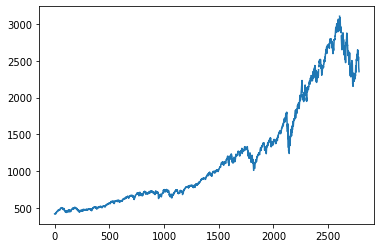

In [3]:
# Plotting the features that make sense to plot to get a general feel for the shape/trend of each
def plotFeature(feature):
    df[feature].plot()
# Feature1: very sporadic, no real trend as far as I can tell
# Feature2: Not a lot of unique data, everything in 90-100 range over time, jumps up and down
# Feature5: somewhat linear looking, kinda looks like a stock price of some sort
# Feature6: somewhat linear in the same sense as feature5, but concave upish instead of 5's concave down
# Feature7: very sporadic, similar trend by the looks of it to feature6
# Feature8: very similar to feature5 by the looks of it
# Target:has an exponential looking trend to it, closest to feature6 by the looks of it
plotFeature('Target')

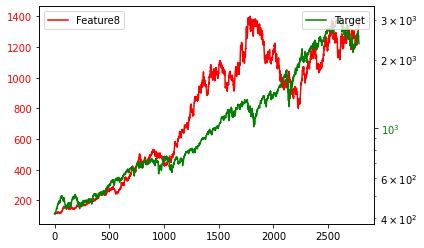

In [17]:
'''Method to plot two features on one graph to get an idea of how similar different features are to each other
or one feature to the target'''
def plotRelationships(feature1, feature2):
    # create subplot structure
    fig, ax = plt.subplots()
    ax.plot(df[feature1], label = feature1, color='red')
    ax.tick_params(axis='y', labelcolor='red')
    # creates a twin axis that shares the x axis, which will be used to plot the other feature
    ax2 = ax.twinx()
    ax2.plot(df[feature2],label=feature2, color='green')
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor='green')
    # add legends to feature, and put them in different spots to prevent overlap
    ax.legend()
    ax2.legend(loc = 'upper right')

plotRelationships('Feature8','Target')

In [5]:
'''For feature 7 and target, since the data is moving forward in time, will fill any missing gaps
with with the mean of the values in-between, and since the first row is NaN will put in the value '''
df['Feature7']=df['Feature7'].interpolate(method='linear', limit_direction ='forward')
df['Target']=df['Target'].interpolate(method='linear', limit_direction ='forward')
df.at[0,'Feature7'] = df.at[1,'Feature7']
df.at[0,'Target'] = df.at[1,'Target']

'''Looking through the CSV file for Feature 4, there are only specific values on specific days to start,
which may indicate that feature is used for notifying if there was a major spike or dip in the market. 
Starting on 3/30/2015, that feature is full of 7s. So to compensate for the many days at the start where
there are no values, will fill these NaN values with a 1 to act as a dummy value so the rest of that feature
doesn't have to get thrown out over it. I have a hunch that feature is used as a very specific marker for the trend,
so as of now I would hate to have to throw out the feature.'''
df['Feature4']=df['Feature4'].replace(np.nan,1)
df.isna().sum()

Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Target      0
dtype: int64

In [20]:
# Make correlation matrix to see which features are most correlated with the target
corr = df.corr()
print(corr)
'''From the correlation matrix, we can see that 3 of the features have a correlation of over 0.9 with the target,
and we can also see that some features have strong correlations with each other. For example, feature3 and feature6 have a correlation
of 0.93, and feature5 and feature8 have a correlation of 0.92.'''
# Note: In this version of my code, I manually remove features 1 and 2 due to their very low correlation with the target
# and feature 6 because of its way, way too high direct correlation with the target (would make the model very overfit on the training data).
# Below are some of the different combinations of features I tried to drop manually to find the right result before attempting to write the code that checks all the combinations in an automated way
# df.drop(['Feature1','Feature2'],axis=1)
df.drop(['Feature6','Feature1','Feature2'],axis=1)
# df.drop(['Feature6'],axis=1)

          Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
Feature1  1.000000 -0.015493  0.102707 -0.176421 -0.182934  0.091822   
Feature2 -0.015493  1.000000 -0.033049 -0.035620 -0.026728 -0.027703   
Feature3  0.102707 -0.033049  1.000000  0.413414  0.771473  0.932508   
Feature4 -0.176421 -0.035620  0.413414  1.000000  0.603953  0.423395   
Feature5 -0.182934 -0.026728  0.771473  0.603953  1.000000  0.737058   
Feature6  0.091822 -0.027703  0.932508  0.423395  0.737058  1.000000   
Feature7 -0.004347 -0.026400  0.818815  0.450557  0.786673  0.937102   
Feature8 -0.115118 -0.015712  0.814450  0.575451  0.928318  0.785695   
Target    0.111473 -0.030980  0.960788  0.409481  0.747800  0.991483   

          Feature7  Feature8    Target  
Feature1 -0.004347 -0.115118  0.111473  
Feature2 -0.026400 -0.015712 -0.030980  
Feature3  0.818815  0.814450  0.960788  
Feature4  0.450557  0.575451  0.409481  
Feature5  0.786673  0.928318  0.747800  
Feature6  0.937102  0.785695  0.9

,Feature3,Feature4,Feature5,Feature7,Feature8,Target
0,189.51,1.0,13.98,13.4953,111.226153,416.83
1,189.48,1.0,13.99,13.4953,111.721437,416.83
2,189.48,1.0,13.99,13.5303,111.272202,417.91
3,189.48,1.0,13.99,13.5992,114.116897,420.04
4,189.48,1.0,13.99,13.6141,113.592208,420.50
...,...,...,...,...,...,...
2779,426.86,7.0,26.83,25.8568,1339.113903,2444.95
2780,426.86,7.0,26.83,25.5268,1349.338215,2413.74
2781,426.86,7.0,26.83,25.2514,1354.650743,2387.70
2782,426.86,7.0,26.83,25.0084,1375.527183,2364.72


In [7]:
# Split data between training and testing (75/25 train/test split)
# And normalize the data to prevent large values from having too much of an influence
train=df.sample(frac=0.75,random_state=42) # picked a random state to have more consistent results when working on my code
test=df.drop(train.index)
# Checking that they add up (aka no rows being duplicated or missing)
print(df.shape[0])
print(train.shape[0])
print(test.shape[0])
# Split the training and testing sets between X (the features) and Y (the target) 
xTrain = train.loc[:,train.columns != 'Target'].values  
yTrain = train.loc[:,train.columns == 'Target'].values
xTest  = test.loc[:,test.columns != 'Target'].values 
yTest = test.loc[:,test.columns == 'Target'].values
# Because of the "exponential" look of the target, I attempted taking the logs of both the X and Y data 
# to try and improve the accuracy of the regression, but it didn't work
# xTrain = np.log(train.loc[:,train.columns != 'Target'].values)  
# yTrain = np.log(train.loc[:,train.columns == 'Target'].values)
# xTest  = np.log(test.loc[:,test.columns != 'Target'].values) 
# yTest = np.log(test.loc[:,test.columns == 'Target'].values)

print('Done splitting data')
# Normalize the data to prevent large values from having too large of an influence
xTrainNormalized = xTrain / np.linalg.norm(xTrain)
yTrainNormalized = yTrain / np.linalg.norm(yTrain)
xTestNormalized = xTest / np.linalg.norm(xTest)
yTestNormalized = yTest / np.linalg.norm(yTest)
print('Done normalizing data')

2784
2088
696
Done splitting data
Done normalizing data


Part 1: Linear Regression Model

Because we are unsure about which features should have the strongest weighting and are the most significant to the regression, the regression should be made as a form of a stepwise regression to pick which features give the best results.

References for understanding the concepts:
https://www.investopedia.com/terms/s/stepwise-regression.asp
https://machinelearningcompass.com/machine_learning_models/ridge_regression/
https://machinelearningcompass.com/machine_learning_models/lasso_regression/

Because I do not know how to program a linear regression only using numpy (I can with packages like sklearn), here is the reference for the code I used and then worked on modifying as much as I could to fix and improve my results:
https://euanrussano.github.io/20190810linearRegressionNumpy/

In [8]:
# Initialize starting set of theta parameters, one weight for each feature
theta0 = np.zeros((xTrainNormalized.shape[1],1))+5

# Method to calculate the gradient of the theta parameters for gradient descent
def grad(theta):
    dJ = 1/len(xTrain)*np.sum((xTrainNormalized.dot(theta)-yTrainNormalized)*xTrainNormalized,axis=0).reshape(-1,1)
    return dJ


In [9]:
# Method to calculate the cost function to see the mean square error of the current theat parameters
def cost(theta):
    J = np.sum((xTrainNormalized.dot(theta)-yTrainNormalized)**2,axis=0)[0]
    return J

In [10]:
# Method for doing the gradient descent on the network training to iteratively change 
# the parameters theta to reduce the error in the regression 
def GD(theta0,learning_rate = 0.5,epochs=100000,TOL=1e-7):
    # history tracking for print logging to keep track of the training progress
    theta_history = [theta0]
    J_history = [cost(theta0)]
    
    thetanew = theta0*10000
    print(f'epoch \t Cost(J) \t')
    # for as many epochs as is specified
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
        # calculate the gradient as well as the error
        dJ = grad(theta0)
        J = cost(theta0)
        # update theta parameters based on the gradient and the learning rate
        thetanew = theta0 - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        # if the change in theta parameters is less than the tolerance, the model has converged
        if np.sum((thetanew - theta0)**2) < TOL:
            print('Convergence achieved.')
            break
        theta0 = thetanew

    return thetanew,theta_history,J_history


In [11]:
theta,theta_history,J_history = GD(theta0)

epoch 	 Cost(J) 	
    0	16.0768	
  100	15.3329	
  200	14.6164	
  300	13.9335	
  400	13.2825	
  500	12.6619	
  600	12.0703	
  700	11.5065	
  800	10.9689	
  900	10.4566	
 1000	 9.9682	
 1100	 9.5026	
 1200	 9.0588	
 1300	 8.6358	
 1400	 8.2325	
 1500	 7.8481	
 1600	 7.4817	
 1700	 7.1324	
 1800	 6.7995	
 1900	 6.4821	
 2000	 6.1796	
 2100	 5.8912	
 2200	 5.6163	
 2300	 5.3543	
 2400	 5.1045	
 2500	 4.8664	
 2600	 4.6395	
 2700	 4.4231	
 2800	 4.2169	
 2900	 4.0203	
 3000	 3.8329	
 3100	 3.6543	
 3200	 3.4840	
 3300	 3.3217	
 3400	 3.1670	
 3500	 3.0195	
 3600	 2.8789	
 3700	 2.7449	
 3800	 2.6172	
 3900	 2.4954	
 4000	 2.3794	
 4100	 2.2687	
 4200	 2.1632	
 4300	 2.0627	
 4400	 1.9669	
 4500	 1.8755	
 4600	 1.7884	
Convergence achieved.


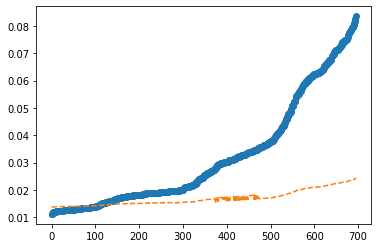

In [22]:
# Utilize the testing data to evaluate the model's accuracy by having the model predict what the y values should be
yprednorm = xTestNormalized.dot(theta)
maxy, miny = np.max(yTestNormalized), np.min(yTestNormalized)
ypred = yprednorm*(maxy-miny) + miny
sortidx = np.argsort(yTestNormalized[:,0])
plt.plot(yTestNormalized[sortidx,0],'o')
plt.plot(ypred[sortidx,0],'--')


In [25]:
# Evaluate the model accuracy by finding the mean squared error
meanSquaredError = np.sum((ypred-yTestNormalized)**2,axis=0)[0]
print('Mean Squared Error: ', meanSquaredError)

# Considering that the range of values, as shown in the graph generated in the above code cell, is between 0.01 and 0.05,
# the mean squared error of the regression is very high

Mean Squared Error:  0.36694872135745543


' Considering that the range of values, as shown in the graph generated in the above code cell, is between 0.01 and 0.05,\nthe mean squared error of the regression is very high'

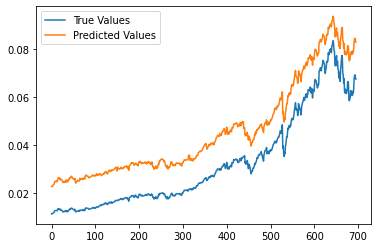

In [16]:
# For fun, I decided to compare the manual linear regression to sklearn's pre-trained LinearRegression model
from sklearn.linear_model import LinearRegression
testModel = LinearRegression()
testModel.fit(xTrainNormalized, yTrainNormalized)
yPred = testModel.predict(xTestNormalized)
plt.plot(yTestNormalized, label='True Values')
plt.plot(yPred, label = 'Predicted Values')
plt.legend()
# Looking at the graph, it is evident that sklearn's model is much more accurate at following the shape of the data.
# Granted, every predicted value is shifted up by approximately 0.01, but overall it performs much better than the first model

Part 2: Training any ML model on the data

For this part of the problem, I opted to using a polynomial regression on the data (using the same data that was preprocessed and split for the first part). I decided to utilize a polynomial regression since when I looked at the graph of the target column (in the code cell of my code where the different feature or target columns can be plotted), it reminded me of a very wide looking parabola. For this reason, I decided to utilize sklearn's PolynomialFeatures class to generate a "polynomial" version of the features that would then be passed in the linear regression model to do the polynomial regression. In the end, this worked very well, achieving a MSE of around 0.00024557, indicating a model that can successfully predict on the given data, however is very much overfit and may have difficulties generalizing outside of the training and testing data sets.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

bestDegree = 0
bestMSE = 9999999999
degrees = [2,3,4,5]
'''To determine what degree polynomial works the best, I decided to iterate over different possible values for the degree of the polynomial,
    and the polynomial degree that achieved the lowest MSE is the one that was saved to be re-trained as the final model.'''
for degreeVal in degrees:
    model = Pipeline([('poly', PolynomialFeatures(degree=degreeVal)),('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(xTrainNormalized, yTrainNormalized)
    preds = model.predict(xTestNormalized)
    currentMSE = mean_squared_error(yTestNormalized, preds)
    if  currentMSE < bestMSE:
        bestMSE = currentMSE
        bestDegree = degreeVal
model = Pipeline([('poly', PolynomialFeatures(degree=bestDegree)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(xTrainNormalized, yTrainNormalized)
preds = model.predict(xTestNormalized)
print('Best degree for polynomial regression: ',bestDegree)
print('MSE for regression with the best degree: ',mean_squared_error(yTestNormalized, preds))
'''Note: The current model that is generated in the above code is overfit on the data because it uses multiple 
features that are very strongly correlated (0.9+ correlation) with the target. To fix this, a model would need to be trained
that either uses fewer features to be able to generalize better outside of the training data, or by utilizing less data in training
and saving more of the data for testing'''

Best degree for polynomial regression:  2
MSE for regression with the best degree:  0.0002455703642003869
